# Today  we will build an end-to-end model to process and identify the Covid X-Ray images with CNN

In [1]:
from fastai  import  *
from fastai.vision import *

In [2]:
path='/content/drive/MyDrive/Coviddata_set'

In [3]:
path

'/content/drive/MyDrive/Coviddata_set'

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=ImageDataBunch.from_folder(path,train='.', valid_pct=0.2, ds_tfms=get_transforms(),size=224)

In [7]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (8493 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
COVID,COVID,COVID,COVID,COVID
Path: /content/drive/MyDrive/Coviddata_set;

Valid: LabelList (2123 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Normal,Normal,Normal,Normal,COVID
Path: /content/drive/MyDrive/Coviddata_set;

Test: None

In [9]:
learn=cnn_learner(data,models.resnet18, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [10]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [11]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,error_rate,time


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.447274,0.215551,0.916627,0.083373,51:49
1,0.251538,0.152433,0.949129,0.050871,01:49
2,0.207580,0.143144,0.941592,0.058408,01:39


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

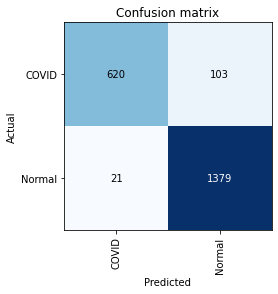

In [14]:
interp.plot_confusion_matrix()

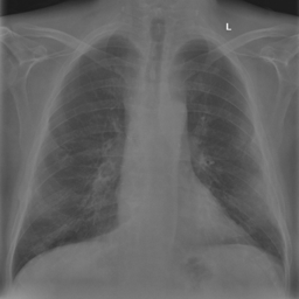

In [22]:
i=open_image('/content/drive/MyDrive/Coviddata_set/COVID/COVID-1506.png')
i

In [23]:
what,_,probs =learn.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a COVID!
Probability it's a COVID: 0.003327


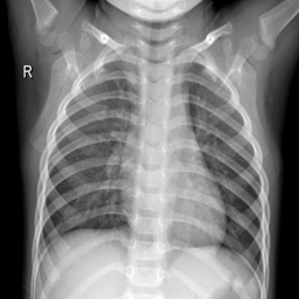

In [26]:
i=open_image('/content/drive/MyDrive/Coviddata_set/Normal/Normal-1182.png')
i

In [27]:
what,_,probs =learn.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a Normal!
Probability it's a Normal: 0.999680
